In [1]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Subset, Dataset, DataLoader
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd

plt.ion()   # interactive mode
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        
    def forward(self, x):
        x = self.fc1(x)
        return x

In [76]:
""" LeNet architecture implementation
"""
from torch import nn, optim
from torch.autograd import Variable
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, (5,5), padding=2)
        self.conv2 = nn.Conv2d(6, 16, (5,5))
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 5)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, (2,2))
#         x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


In [77]:
p = torch.tensor([[0, 0, 0, 1, 0]])
p_target =  p / p.sum()
print(p_target)

tensor([[0, 0, 0, 1, 0]])


In [84]:
x = torch.randn((1, 1, 28, 28), requires_grad=True)


In [85]:

criterion = nn.CrossEntropyLoss()#
optimizer = optim.Adam([x], lr=0.05)


for t in range(1):
#     model = LeNet()
    model = torch.load('LeNet_5_class_pretrained_model.tar')
    model.eval()
    for i in range(600):
        optimizer.zero_grad()
        image = torch.tanh(x)
        logits = model(image)#
        prob = torch.softmax(logits, -1)
        #  loss = criterion(prob, p_traget)
        loss = p_target * prob.log()
        loss = - loss.sum(-1).mean()
        loss.backward()
        optimizer.step()
        if i % 20 == 0:
            print('loss', loss.item())



loss 4.719367980957031
loss 4.386998261907138e-05
loss 2.741851312748622e-05
loss 2.5391900635440834e-05
loss 2.47958396357717e-05
loss 2.4438202672172338e-05
loss 2.396135460003279e-05
loss 2.3484506527893245e-05
loss 2.30076584557537e-05
loss 2.2530810383614153e-05
loss 2.2053962311474606e-05
loss 2.157711423933506e-05
loss 2.1100266167195514e-05
loss 2.062341991404537e-05
loss 2.014657366089523e-05
loss 1.9669725588755682e-05
loss 1.919287933560554e-05
loss 1.8835246009984985e-05
loss 1.8358399756834842e-05
loss 1.78815535036847e-05
loss 1.7404707250534557e-05
loss 1.7047073924914002e-05
loss 1.657022767176386e-05
loss 1.6212594346143305e-05
loss 1.585496102052275e-05
loss 1.5378116586362012e-05
loss 1.5020483260741457e-05
loss 1.4662849935120903e-05
loss 1.430521751899505e-05
loss 1.3947584193374496e-05


In [87]:
y = torch.tanh(x)

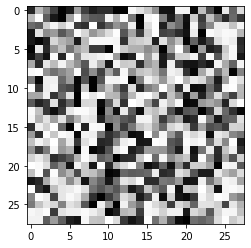

In [88]:
y = y.detach().numpy()
z = y[0,0,:,:]
plt.imshow(z, cmap='Greys', interpolation='nearest')
